### Class 12

###### 1. Download the time series of prices for the S&P500 ETF and compute the time series of relative returns. Plot the histogram
###### 2. Historical Simulation VaR 
###### 3. Parametric VaR
###### 4. Count the number of violations on a rolling window
###### 5. Backtesting of VaR

In [100]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import yfinance as yf

### 1. Download the time series of prices for the S&P500 ETF and compute the time series of relative returns. Plot the histogram

In [101]:
# Download historical adjusted closing prices for the S&P500 ETF (SPY) 
# from Yahoo Finance, starting from January 1, 2018.
prices = yf.download(['SPY'], start='2018-01-01')['Adj Close']

# Calculate daily percentage returns using the `.pct_change()` method, 
# which computes the percentage change between consecutive data points.
ret = prices.pct_change()

# Remove the first row (NaN) generated by the percentage change calculation
# since there's no previous data point to calculate the return for the first entry.
ret = ret[1:]

[*********************100%***********************]  1 of 1 completed


In [102]:
ret.head()

Ticker,SPY
Date,
2018-01-03 00:00:00+00:00,0.006325
2018-01-04 00:00:00+00:00,0.004215
2018-01-05 00:00:00+00:00,0.006664
2018-01-08 00:00:00+00:00,0.001828
2018-01-09 00:00:00+00:00,0.002264


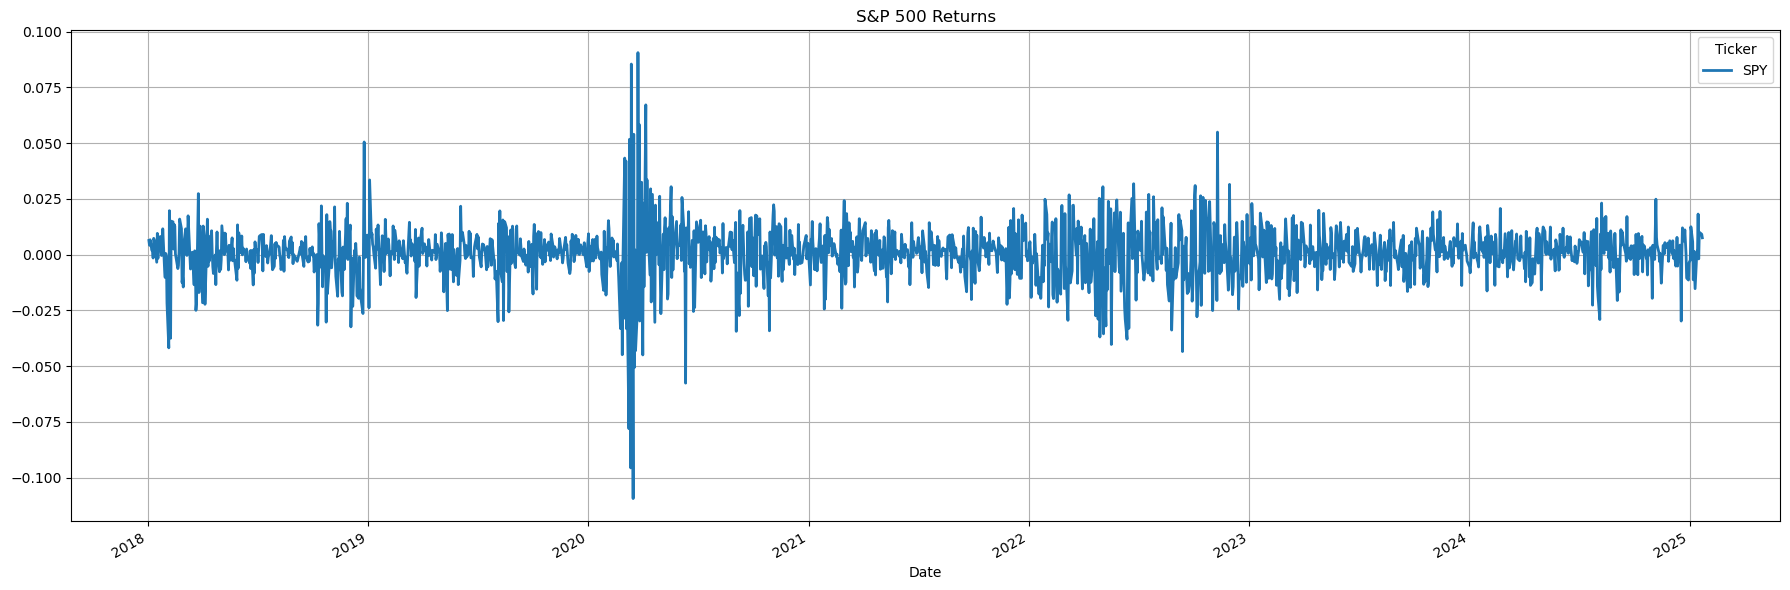

In [103]:
# plot the relative returns
ret.plot(figsize=(18,6), grid=True, linewidth=2, title='S&P 500 Returns')
plt.tight_layout()

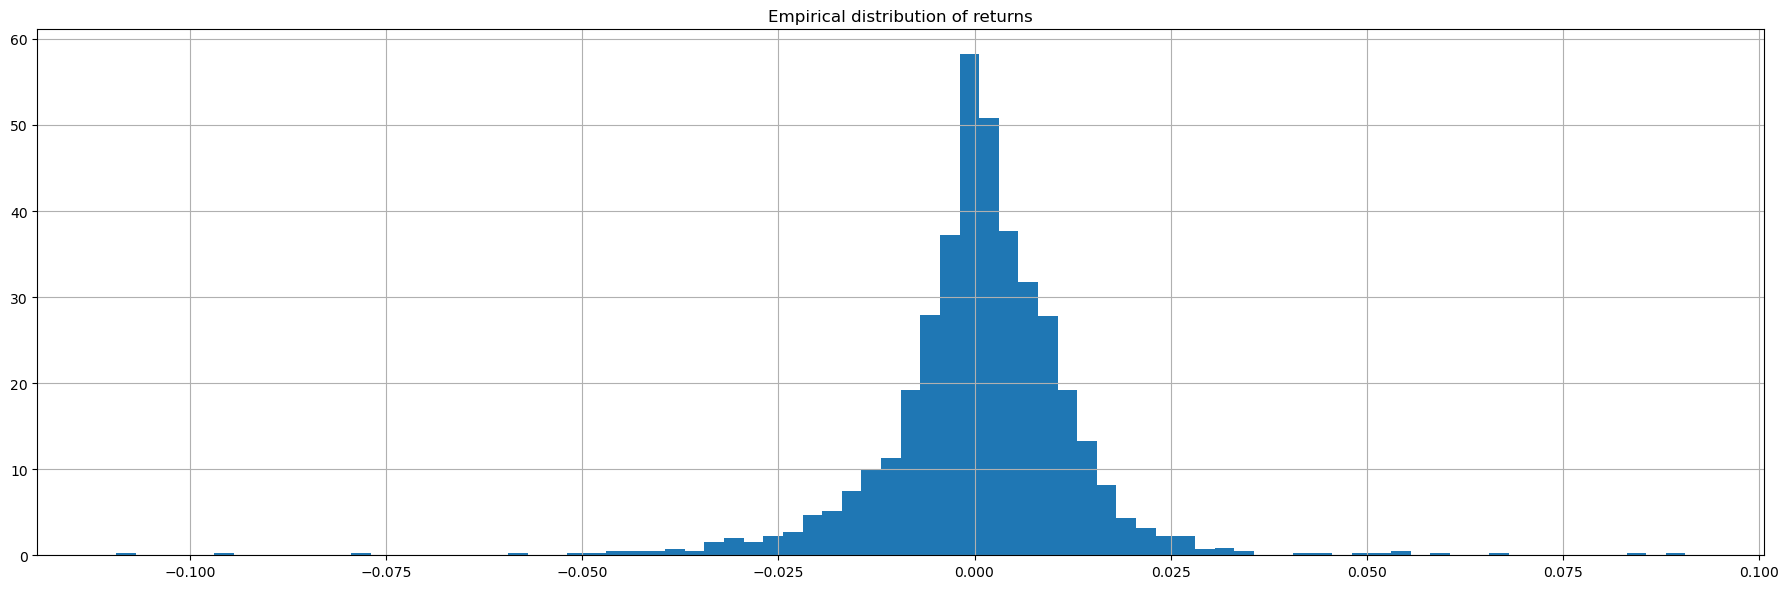

In [104]:
# histogram of relative returns
ret.hist(bins = 80, density=True, figsize = (18,6))
plt.title('Empirical distribution of returns')
plt.tight_layout()

### 2. Historical Simulation VaR

In [105]:
# 1. **Historical VaR**:
#    - Based on actual historical returns data.
#    - Uses quantiles of the historical distribution to estimate potential losses.
#    - Assumes that past return patterns will continue in the future.
#    - Advantage: Non-parametric and captures real market behaviors (e.g., skewness, fat tails).
#    - Limitation: Highly dependent on the quality and quantity of historical data; doesn't adapt well to structural changes or rare events.

# Define the initial capital invested in Euros
V0 = 100  # Capital invested (in Euros)

# Compute Historical VaR (Value at Risk) at 99% confidence level
# The quantile(0.01) function gives the 1st percentile (1% worst-case loss)
# The VaR is computed as minus the investment value (V0) multiplied by this quantile
VaR_99 = -V0 * ret.quantile(0.01).item()
print("Historical VaR 99%:", VaR_99, "Euro")
# Interpretation: There is a 1% probability of losing more than this value in a single day.

# Compute Historical VaR (Value at Risk) at 95% confidence level
# The quantile(0.05) function gives the 5th percentile (5% worst-case loss)
VaR_95 = -V0 * ret.quantile(0.05).item()
print("Historical VaR 95%:", VaR_95, "Euro")
# Interpretation: There is a 5% probability of losing more than this value in a single day.

# Compute Historical VaR (Value at Risk) at 90% confidence level
# The quantile(0.10) function gives the 10th percentile (10% worst-case loss)
VaR_90 = -V0 * ret.quantile(0.10).item()
print("Historical VaR 90%:", VaR_90, "Euro")
# Interpretation: There is a 10% probability of losing more than this value in a single day.


Historical VaR 99%: 3.3941433473054983 Euro
Historical VaR 95%: 1.847081353329838 Euro
Historical VaR 90%: 1.2199514668651656 Euro


### 3. Parametric VaR 

In [106]:
# Calculate the mean (expected return) of the historical daily returns
mu = ret.mean()
mu = mu.item()
# This represents the average daily return, assuming a Gaussian (normal) distribution.

# Calculate the standard deviation (volatility) of the historical daily returns
sigma = ret.std()
sigma = sigma.item()
# This represents the dispersion of returns around the mean, a measure of risk or variability.

# Print the mean and standard deviation
print("Mean of daily returns:", mu)
print("Standard deviation of daily returns:", sigma)

Mean of daily returns: 0.0005992893117262761
Standard deviation of daily returns: 0.012239636942899064


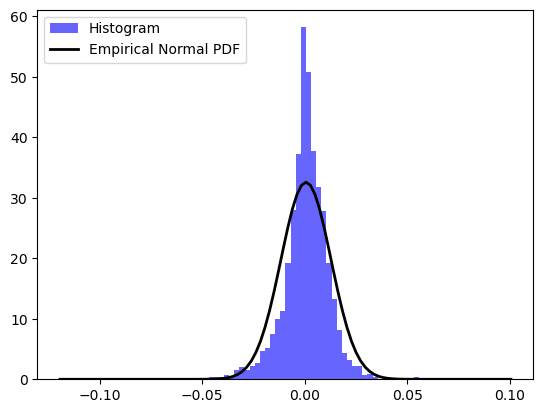

In [107]:
plt.hist(ret, bins=80, density=True, alpha=0.6, color='b', label="Histogram")
  
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = st.norm.pdf(x, mu, sigma)
  
plt.plot(x, p, 'k', linewidth=2, label="Empirical Normal PDF")
plt.legend(loc='upper left')
plt.show()

In [108]:
# 2. **Model VaR (Parametric VaR)**:
#    - Based on statistical models (e.g., Gaussian distribution) with parameters like mean (mu) and standard deviation (sigma).
#    - Relies on assumptions about the return distribution (e.g., normality).
#    - Advantage: Easy to compute and scale for different time horizons and confidence levels.
#    - Limitation: Assumes a specific distribution, which may not fully capture real-world risks (e.g., extreme events or non-normality).

# Set initial parameters
t = 1       # Time horizon (in days)
V0 = 100    # Initial capital (in Euros)

# Compute Model VaR 99% confidence
alpha = 0.99  # Confidence level
z_alpha = st.norm.ppf(alpha)  # z-score corresponding to the 99% confidence level
# Parametric (model-based) VaR formula:
# VaR = V0 * [sigma * z_alpha * sqrt(t) - mu * t]
mVaR_99 = V0 * (sigma * z_alpha * np.sqrt(t) - mu * t)
print("Model VaR 99%:", mVaR_99, "euro")
# Interpretation: There is a 1% probability of losing more than this value over the specified time horizon.

# Compute Model VaR 95% confidence
alpha = 0.95  # Confidence level
z_alpha = st.norm.ppf(alpha)  # z-score for 95% confidence
mVaR_95 = V0 * (sigma * z_alpha * np.sqrt(t) - mu * t)
print("Model VaR 95%:", mVaR_95, "euro")
# Interpretation: There is a 5% probability of losing more than this value over the specified time horizon.

# Compute Model VaR 90% confidence
alpha = 0.90  # Confidence level
z_alpha = st.norm.ppf(alpha)  # z-score for 90% confidence
mVaR_90 = V0 * (sigma * z_alpha * np.sqrt(t) - mu * t)
print("Model VaR 90%:", mVaR_90, "euro")
# Interpretation: There is a 10% probability of losing more than this value over the specified time horizon.


Model VaR 99%: 2.78743640694187 euro
Model VaR 95%: 1.9533121906370479 euro
Model VaR 90%: 1.5086436574143547 euro


In [109]:
# In summary:
# - Historical VaR directly reflects empirical data but lacks flexibility for changes in market dynamics.
# - Model VaR is more adaptable and computationally efficient but relies on simplifying assumptions that may overlook real-world complexities.

### 4. Count the number of violations on a rolling window.

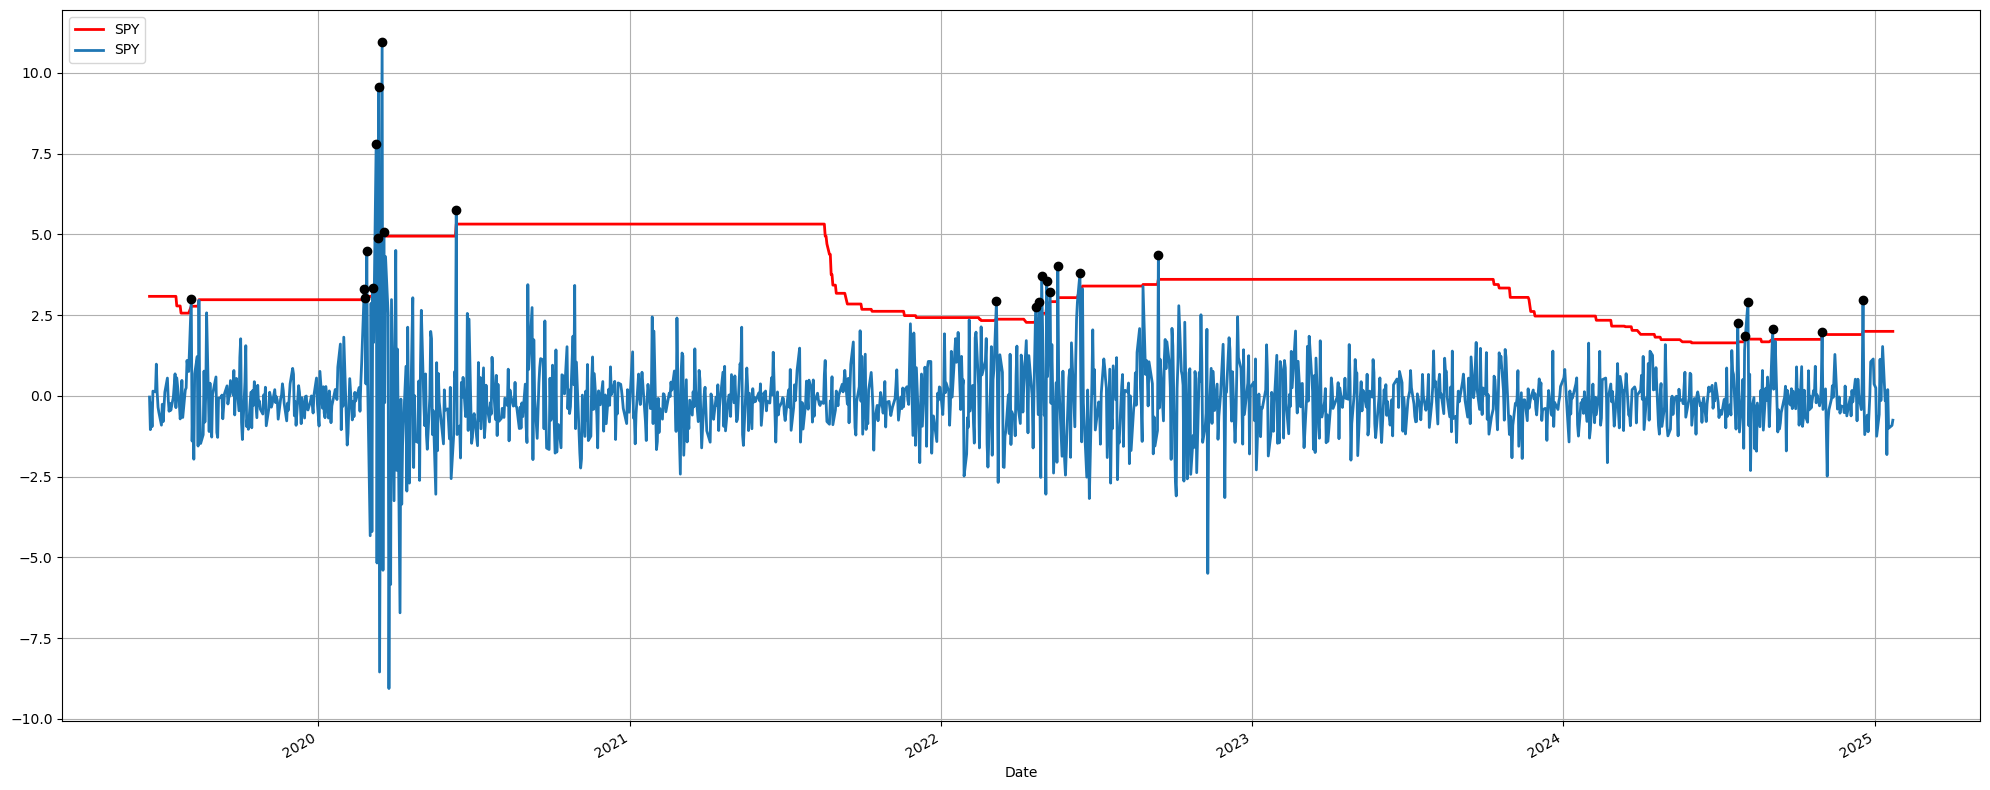

In [110]:
# Define the confidence level for Historical VaR
alpha = 0.99

# Compute rolling 1-year Historical VaR at 99% confidence
# - `rolling(365)`: Calculates a rolling window of 365 days (1 year).
# - `quantile(1-alpha)`: Finds the (1-alpha) quantile for each rolling window.
VaR_roll = -V0 * ret.rolling(365).quantile(1 - alpha)
# Remove the initial NaN values (due to insufficient data in the first 364 days)
VaR_roll = VaR_roll.iloc[364:]

# Compute daily losses
Loss = -V0 * ret


# Create a single figure and axis for plotting
fig, ax = plt.subplots(figsize=(20, 8))  # Use subplots to get a specific axis object

# Plot rolling VaR and losses on the same axis
VaR_roll.plot(ax=ax, grid=True, linewidth=2, color="r", label="Historical VaR 99% (euro)")
Loss.iloc[364:].plot(ax=ax, grid=True, linewidth=2, label="Loss (euro)")

# Identify and plot VaR violations (losses exceeding VaR threshold)
VaR_violations = []  # List to store information about violations
for i in range(0, len(VaR_roll)):
    # Check if loss exceeds VaR
    if Loss.iloc[i + 364].item() > VaR_roll.iloc[i].item():  
        plt.plot(Loss.index[i + 364], Loss.iloc[i + 364].item(), "ko")  # Mark violations on the plot
        # Append violation details: date, loss amount, and corresponding VaR
        VaR_violations.append((Loss.index[i + 364], Loss.iloc[i + 364].item(), VaR_roll.iloc[i].item()))

# Add legend and layout adjustments
ax.legend(loc="upper left")
plt.tight_layout()  # Adjust layout for clarity

# Create a DataFrame to summarize VaR violations
VaR_violations = pd.DataFrame(VaR_violations, columns=["Date", "Loss (euro)", "Historical VaR (euro)"])
VaR_violations = VaR_violations.set_index("Date")  # Set the Date column as the index





In [111]:
# Display the DataFrame containing all Historical VaR violations
print(VaR_violations)

# Print the total number of VaR violations
print("Number of violations:", len(VaR_violations))

# Calculate and display the expected number of violations
# Expected violations = (1 - alpha) * Total rolling windows
# This represents the theoretical number of violations based on the confidence level
expected_violations = round((1 - alpha) * len(VaR_roll))
print("Expected Number of violations:", expected_violations)

                           Loss (euro)  Historical VaR (euro)
Date                                                         
2019-08-05 00:00:00+00:00     3.007299               2.773690
2020-02-24 00:00:00+00:00     3.316532               3.015417
2020-02-25 00:00:00+00:00     3.030202               3.029976
2020-02-27 00:00:00+00:00     4.491147               3.079196
2020-03-05 00:00:00+00:00     3.324190               3.192916
2020-03-09 00:00:00+00:00     7.809435               3.267702
2020-03-11 00:00:00+00:00     4.874853               3.319289
2020-03-12 00:00:00+00:00     9.567701               3.744295
2020-03-16 00:00:00+00:00    10.942379               4.629281
2020-03-18 00:00:00+00:00     5.063321               4.942701
2020-06-11 00:00:00+00:00     5.764894               5.315887
2022-03-07 00:00:00+00:00     2.947915               2.371770
2022-04-22 00:00:00+00:00     2.743918               2.371770
2022-04-26 00:00:00+00:00     2.896088               2.421987
2022-04-

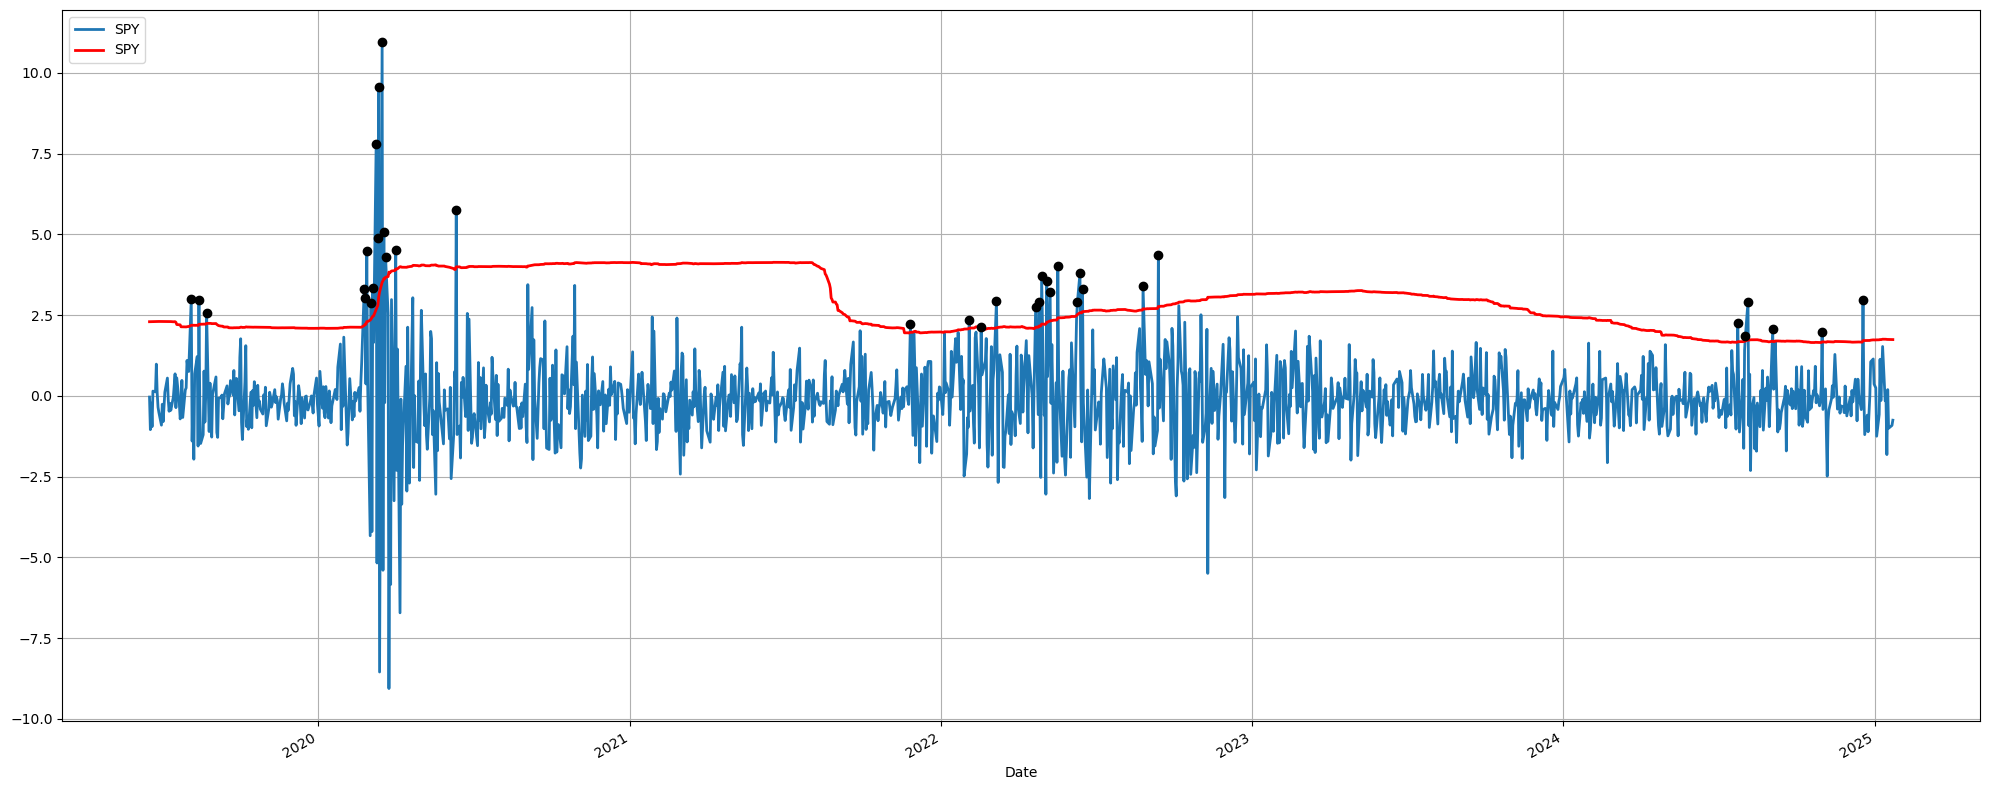

In [112]:
# Parameters for Model VaR with Rolling Windows
alpha = 0.99  # Confidence level
t = 1         # Time horizon (in days)
V0 = 100      # Initial capital (in Euros)

# Calculate rolling mean (mu) and rolling standard deviation (sigma) over 1 year (365 days)
mu_roll = ret.rolling(365).mean()  # Rolling mean of returns
mu_roll = mu_roll[364:]  # Remove the initial NaN values (first 364 days)

sig_roll = ret.rolling(365).std()  # Rolling standard deviation of returns
sig_roll = sig_roll[364:]  # Remove the initial NaN values (first 364 days)

# Calculate the z-score for the 99% confidence level
z_alpha = st.norm.ppf(alpha)

# Compute Model VaR for each rolling window
# VaR = V0 * [sigma * z_alpha * sqrt(t) - mu * t]
mVaR_roll = V0 * (sig_roll * z_alpha * np.sqrt(t) - mu_roll * t)

# Plot the Losses and the Rolling Model VaR
fig, ax = plt.subplots(figsize=(20, 8))  # Use subplots to get a specific axis object 
Loss.iloc[364:].plot(ax=ax,grid=True, linewidth=2, label="Loss (euro)")  # Plot daily losses
mVaR_roll.plot(ax=ax,grid=True, linewidth=2, color="r", label="Model VaR 99% (euro)")  # Plot rolling Model VaR

# Identify and mark VaR violations (Loss > Model VaR)
mVaR_violations = []  # List to store violations
for i in range(0, len(mVaR_roll)):
    if Loss.iloc[i + 364].item() > mVaR_roll.iloc[i].item():  # Compare Loss against Model VaR
        plt.plot(Loss.index[i + 364], Loss.iloc[i + 364].item(), "ko")  # Mark violations on the plot
        # Append violation details: date, loss, and corresponding Model VaR
        mVaR_violations.append((Loss.index[i + 364], Loss.iloc[i + 364].item(), mVaR_roll.iloc[i].item()))

# Add legend and adjust layout
plt.legend(loc="upper left")
plt.tight_layout()  # Optimize plot layout

# Create a DataFrame to store violation details
mVaR_violations = pd.DataFrame(mVaR_violations, columns=["Date", "Loss (euro)", "VaR (euro)"])
mVaR_violations = mVaR_violations.set_index("Date")  # Set Date column as index

In [113]:
# Display the DataFrame containing all Model VaR violations
print(mVaR_violations)

# Print the total number of Model VaR violations
print("Number of violations:", len(mVaR_violations))

# Calculate and display the expected number of violations
# Expected violations = (1 - alpha) * Total rolling windows
# This is based on the confidence level and the number of observations.
expected_violations = round((1 - alpha) * len(VaR_roll))
print("Expected Number of violations:", expected_violations)


                           Loss (euro)  VaR (euro)
Date                                              
2019-08-05 00:00:00+00:00     3.007299    2.182125
2019-08-14 00:00:00+00:00     2.956778    2.214445
2019-08-23 00:00:00+00:00     2.568706    2.242776
2020-02-24 00:00:00+00:00     3.316532    2.176059
2020-02-25 00:00:00+00:00     3.030202    2.216311
2020-02-27 00:00:00+00:00     4.491147    2.297227
2020-03-03 00:00:00+00:00     2.863221    2.378017
2020-03-05 00:00:00+00:00     3.324190    2.463492
2020-03-09 00:00:00+00:00     7.809435    2.672200
2020-03-11 00:00:00+00:00     4.874853    2.807277
2020-03-12 00:00:00+00:00     9.567701    3.066203
2020-03-16 00:00:00+00:00    10.942379    3.513041
2020-03-18 00:00:00+00:00     5.063321    3.627362
2020-03-20 00:00:00+00:00     4.309437    3.670902
2020-04-01 00:00:00+00:00     4.500498    3.928638
2020-06-11 00:00:00+00:00     5.764894    3.992052
2021-11-26 00:00:00+00:00     2.230314    1.967318
2022-02-03 00:00:00+00:00     2

### 5. Backtesting of VaR

In [114]:
# VaR backtesting uses hypothesis testing to evaluate if the model predicted violations match observed data.
#
# 1. Hypotheses:
#    - Null hypothesis (H0): The model is correct, and violations follow a binomial distribution with p = 1 - α.
#    - Alternative hypothesis (H1): The model is incorrect, and observed violations deviate significantly.
#
# 2. Procedure:
#    - Compute the expected number of violations (th_viol) using the total observations (N_obs) and probability p.
#    - Count the observed violations (N_violations).
#    - Use a binomial distribution to calculate the tail probability (Tail_prob) for observing at least N_violations.
#
# 3. Decision:
#    - If Tail_prob < significance level (1 - confidence), reject H0 (model is invalid).
#    - Otherwise, fail to reject H0 (model is valid).

In [115]:
# Compare number of theoretical violations with effective violations (99% Confidence)
# After testing HP1: the probability of an exception on any given day is p

# Backtest parameters
Backtest_level_confidence = 0.95  # Confidence level for backtesting
p = (1 - alpha)  # Expected probability of a violation on any given day
th_viol = round(p * len(VaR_roll))  # Theoretical number of violations
print("Expected number of violations:", th_viol)

# Historical VaR Backtesting
N_obs = len(VaR_roll)  # Total number of observations (rolling windows)
N_violations = len(VaR_violations)  # Actual number of violations observed
print("\nHistorical simulation VaR at", alpha, "% confidence level\n")
print("Observed number of violations:", N_violations)

# Calculate the tail probability for observed violations using a binomial distribution
Tail_prob_Hist = 1 - st.binom.cdf(N_violations, N_obs, p)
print("Probability that the number of violations is greater than the observed one:", Tail_prob_Hist)

# Decision for Historical VaR
if Tail_prob_Hist < (1 - Backtest_level_confidence):
    print(f"We reject the Historical VaR with {Backtest_level_confidence*100}% confidence")
else:
    print(f"We accept the Historical VaR with {Backtest_level_confidence*100}% confidence")

# Parametric Normal VaR Backtesting
N_violations = len(mVaR_violations)  # Actual number of violations observed for Model VaR
print("\nParametric Normal VaR at", alpha, "% confidence level\n")
print("Observed number of violations:", N_violations)

# Calculate the tail probability for observed violations using a binomial distribution
Tail_prob_NormalModel = 1 - st.binom.cdf(N_violations, N_obs, p)
print("Probability that the number of violations is greater than the observed one:", Tail_prob_NormalModel)

# Decision for Parametric Normal VaR
if Tail_prob_NormalModel < (1 - Backtest_level_confidence):
    print(f"We reject the Normal model VaR with {Backtest_level_confidence*100}% confidence")
else:
    print(f"We accept the Normal model VaR with {Backtest_level_confidence*100}% confidence")


Expected number of violations: 14

Historical simulation VaR at 0.99 % confidence level

Observed number of violations: 26
Probability that the number of violations is greater than the observed one: 0.001348046026721006
We reject the Historical VaR with 95.0% confidence

Parametric Normal VaR at 0.99 % confidence level

Observed number of violations: 37
Probability that the number of violations is greater than the observed one: 8.407229612483746e-08
We reject the Normal model VaR with 95.0% confidence


In [ ]:
# The backtesting results indicate a comparison between the expected and observed number 
# of violations for both Historical simulation VaR and Parametric Normal VaR at a 99% confidence level.
#
# 1. **Historical Simulation VaR Results**:
#    - The expected number of violations (theoretical) is 14, while the observed violations are 25.
#    - The tail probability (probability of observing more than or equal to 25 violations) is very low 
#      at 0.0019, which is below the significance threshold (0.05 for a 95% confidence level).
#    - Conclusion: The null hypothesis for the Historical VaR model is rejected, meaning the model 
#      does not align with the observed data at a 95% confidence level.
#
# 2. **Parametric Normal VaR Results**:
#    - The expected number of violations (theoretical) is 14, but the observed violations are even 
#      higher at 36.
#    - The tail probability here is extremely low (1.23e-07), well below the threshold.
#    - Conclusion: The null hypothesis for the Parametric Normal VaR model is also rejected, 
#      indicating that this model significantly underestimates risk compared to observed violations.
#
# **Overall Interpretation**:
# Both models fail the backtesting process at the 95% confidence level, suggesting that neither the 
# Historical simulation VaR nor the Parametric Normal VaR provides an accurate estimation of risk 
# based on the observed data. The observed violations in both cases exceed the theoretical predictions 
# by a significant margin, implying that the models may need to include additional information or alternative
# approaches to better capture extreme events.
